In [1]:
 # loading and importing packages
import pandas as pd
import numpy as np
import sklearn
import time
import timeit
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold,GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l1

In [ ]:
# loading in the data
df_1000 = pd.read_csv('data/df_1000.csv')
df_10000 = pd.read_csv('data/df_10000.csv')
df_100000 = pd.read_csv('data/df_100000.csv')

In [ ]:
 # 1,000
# setting predictors and outcome variable
Y = df_1000['Y']
X = df_1000[['X1', 'X2', 'X3', 'X4']]
# splitting into training and testing
Xtrain, Xtest, ytrain, ytest = \

  train_test_split(X,Y,test_size = 0.20,random_state = 30)


In [ ]:
## GLM LBFGS 1,000

In [ ]:
#first GLM model
glm1_1000 = TweedieRegressor(power = 0,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'lbfgs')
# fitting the model
glm1_1000.fit(Xtrain, ytrain)

TweedieRegressor(alpha=1, max_iter=300, power=0, tol=1e-06)

In [ ]:
# predictions on training and holdout sets
glm1_trainpreds = glm1_1000.predict(Xtrain)
glm1_testpreds = glm1_1000.predict(Xtest)

#calculating MSE and RMSE for training set
glm1_train_mse = mean_squared_error(ytrain, glm1_trainpreds)
glm1_train_rmse = np.sqrt(glm1_train_mse)

#calculating MSE and RMSE for holdout set
glm1_test_mse = mean_squared_error(ytest, glm1_testpreds)
glm1_test_rmse = np.sqrt(glm1_test_mse)
print('Training set RMSE: ', round(glm1_train_rmse, 5))
print('Holdout set RMSE: ', round(glm1_test_rmse, 5))



Training set RMSE:  2808895.42133
Holdout set RMSE:  2703415.49299


In [ ]:
# R-squared - training set
glm1_1000_Rtrain = glm1_1000.score(Xtrain, ytrain)

# R-squared - testing set
glm1_1000_Rtest = glm1_1000.score(Xtest, ytest)

print('Training set R-squared: ', glm1_1000_Rtrain)
print('Holdout set R-squared: ', glm1_1000_Rtest)

Training set R-squared:  0.8996013172338956
Holdout set R-squared:  0.8871382909339401


In [ ]:
# timing model
glm1_1000_time = """
#first GLM model

glm1_1000 = TweedieRegressor(power = 0,alpha = 1,max_iter = 300,tol =␣
↪1e-6,solver = 'lbfgs')
#Fitting the model
glm1_1000.fit(Xtrain, ytrain)
"""
glm1_1000_time = round(timeit.timeit(stmt = glm1_1000_time, globals=globals(),number=1), 5)
print(glm1_1000_time, 'seconds')

0.01692 seconds


In [ ]:
# fitting time model
train_start = time.time()
glm1_1000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

# prediction time
pred_start = time.time()
glm1_1000.predict(Xtrain)
glm1_1000.predict(Xtest)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time


0.014572381973266602

In [ ]:
# model efficiency
glm1_avg_rmse = (glm1_train_rmse + glm1_test_rmse) / 2
glm1_1000_eff = glm1_avg_rmse / glm1_1000_time
glm1_1000_eff / 100000

1628.9334853205294

In [ ]:
## GLM Newton-Cholesky 1,000

In [ ]:
#second GLM model
glm2_1000 = TweedieRegressor(power = 1,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'newton-cholesky')

#Fitting the model
glm2_1000.fit(Xtrain, ytrain)

TweedieRegressor(alpha=1, max_iter=300, power=1, solver='newton-cholesky',
                 tol=1e-06)

In [ ]:
#predictions on training and holdout sets
glm2_trainpreds = glm2_1000.predict(Xtrain)
glm2_testpreds = glm2_1000.predict(Xtest)

#MSE and RMSE - training
glm2_train_mse = mean_squared_error(ytrain, glm2_trainpreds)
glm2_train_rmse = np.sqrt(glm2_train_mse)

#MSE and RMSE for testing
glm2_test_mse = mean_squared_error(ytest, glm2_testpreds)
glm2_test_rmse = np.sqrt(glm2_test_mse)

print('Training set RMSE: ', round(glm2_train_rmse, 5))
print('Holdout set RMSE: ', round(glm2_test_rmse, 5))



Training set RMSE:  1431480.63428
Holdout set RMSE:  921097.86206


In [ ]:
#R-squared - training set
glm2_1000_Rtrain = glm2_1000.score(Xtrain, ytrain)

#R-squared - testing set
glm2_1000_Rtest = glm2_1000.score(Xtest, ytest)

print('Training set R-squared: ', glm2_1000_Rtrain)
print('Holdout set R-squared: ', glm2_1000_Rtest)

Training set R-squared:  0.9853876367486896
Holdout set R-squared:  0.985099424418628


In [ ]:
#Timing the model
glm2_1000_time = """
#GLM model parameters with newton-cholesky solver
glm2_1000 = TweedieRegressor(power = 1,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'newton-cholesky')
#Fitting the model
glm2_1000.fit(Xtrain, ytrain)
"""
glm2_1000_time = round(timeit.timeit(stmt = glm2_1000_time, globals=globals(),number=1), 5)
print(glm2_1000_time, 'seconds')


0.00591 seconds


In [ ]:
train_start = time.time()
glm2_1000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

pred_start = time.time()

glm2_1000.predict(Xtrain)

glm2_1000.predict(Xtest)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time



0.0034656524658203125

In [ ]:
# model efficiency
glm2_avg_rmse = (glm2_train_rmse + glm2_test_rmse) / 2
glm2_1000_eff = glm2_avg_rmse / train_pred_time

glm2_1000_eff / 100000


3394.1350431743817

In [ ]:
## XGBoost 1,000
#parameters
tuning_grid = {
'max_depth': [3, 4, 5, 6, 7, 8, 9],
'n_estimators': [10, 50, 100, 200, 300],
'learning_rate': [0.1, 0.5, 0.8],
'colsample_bytree': [0.6, 0.8, 1.0],
'reg_alpha': [0, 0.5, 1, 2],
'reg_lambda': [0, 1, 2]
}
xgb_grid_1000 = XGBRegressor(objective = 'reg:tweedie', random_state = 30)

# GridSearchCV object
grid_search = GridSearchCV(estimator = xgb_grid_1000,
param_grid = tuning_grid,
scoring = 'neg_mean_squared_error',
cv = 5,
n_jobs = -1,
verbose = 2)

# fitting the grid search
grid_search.fit(Xtrain, ytrain)


Fitting 5 folds for each of 3780 candidates, totalling 18900 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:tweedie', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.1, 0.5, 0.8],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 200, 300],
                         'reg_alpha': [0, 0.5, 1, 2], 'reg_lambda': [0, 1, 2]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# getting the best parameters
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_alpha': 0,
 'reg_lambda': 2}

In [ ]:
## XGBoost 5-fold Cross Validation 1,000

In [ ]:
#5-fold cross validation
kfoldcv = KFold(n_splits = 5)

#Fitting first model
xgb1_1000 = XGBRegressor(alpha = 2,
learning_rate = 0.5,
max_depth = 3,
n_estimators = 300,
colsample_bytree = 1,
reg_lambda = 0,
objective = 'reg:tweedie',
random_state = 30)

xgb1_1000.fit(Xtrain, ytrain)



XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# evaluating the cross validation score for negative training set
xgb1_train_rslt = cross_val_score(xgb1_1000,
                                  Xtrain, ytrain,
                                  scoring = 'neg_root_mean_squared_error',
                                  cv = kfoldcv,
                                  n_jobs = -1)
# evaluating the cross validation score for negative testing set
xgb1_test_rslt = cross_val_score(xgb1_1000,
                                 Xtest, ytest,
                                 scoring = 'neg_root_mean_squared_error',
                                 cv = kfoldcv,
                                 n_jobs = -1)

#inversing result
xgb1_train_rmse = np.mean(-xgb1_train_rslt)

# inverting the RMSE value
xgb1_test_rmse = np.mean(-xgb1_test_rslt)
print('Training set RMSE: ', round(xgb1_train_rmse, 5))
print('Training set RMSE: ', round(xgb1_test_rmse, 5))


Training set RMSE:  457068.73811
Training set RMSE:  819991.80566


In [ ]:
# R-squared - training set
xgb1_1000_Rtrn = xgb1_1000.score(Xtairn, ytrain)

#R-squared for testing set
xgb1_1000_Rtst = xgb1_1000.score(Xtest, ytest)

print('Training set R-squared: ', xgb1_1000_Rtrain)
print('Holdout set R-squared: ', xgb1_1000_Rtest)


Training set R-squared:  0.9999955105329383
Holdout set R-squared:  0.9950368343884693


In [ ]:
#Timing the model fitting
xgb1_1000_time = """

#Fitting first XGBoost model
xgb1_1000 = XGBRegressor(alpha = 2,learning_rate = 0.5,max_depth = 3,n_estimators = 300, colsample_bytree = 1,reg_lambda = 0,objective = 'reg:tweedie',random_state = 30)
xgb1_1000.fit(Xtrain, ytrain)
"""
xgb1_1000_time = round(timeit.timeit(stmt = xgb1_1000_time, globals=globals(),number=1), 5)
print(xgb1_1000_time, 'seconds')


0.14142 seconds


In [ ]:
train_start = time.time()
xgb1_1000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

pred_start = time.time()

xgb1_1000.predict(Xtrain)
xgb1_1000.predict(Xtest)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time

0.21717429161071777

In [ ]:
#model efficiency
xgb1_avg_rmse = (xgb1_train_rmse + xgb1_test_rmse) / 2
xgb1_1000_eff = xgb1_avg_rmse / train_pred_time

#Dividing to scale the value
xgb1_1000_eff / 100000


29.401743049336606

In [ ]:
## XGBoost Repeated 5-fold Cross Validation with 5 repeats 1,000

In [ ]:
# repeated 5-fold cross validation with 5 repeats
rpt_kfoldcv = RepeatedKFold(n_splits = 5,n_repeats = 5,random_state = 30)

# fitting second XGBoost model
xgb2_1000 = XGBRegressor(alpha = 1,
                         learning_rate = 0.5,
                         max_depth = 3,
                         n_estimators = 300,
                         colsample_bytree = 1,
                         reg_lambda = 1,
                         objective = 'reg:tweedie',
                         random_state = 30)
xgb2_1000.fit(Xtrain, ytrain)


XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#evaluating negative scoring
xgb2_train_rslt = cross_val_score(xgb2_1000,
                                  Xtrain, ytrain,
                                  scoring = 'neg_root_mean_squared_error',
                                  cv = rpt_kfoldcv,
                                  n_jobs = -1)

#evaluating negative scoring
xgb2_test_rslt = cross_val_score(xgb2_1000,
                                 Xtest, ytest,
                                 scoring = 'neg_root_mean_squared_error',
                                 cv = rpt_kfoldcv,
                                 n_jobs = -1)

#inverting value
xgb2_train_rmse = np.mean(-xgb2_train_rslt)

#inverting value
xgb2_test_rmse = np.mean(-xgb2_test_rslt)
print('Training set RMSE: ', round(xgb2_train_rmse, 5))
print('Training set RMSE: ', round(xgb2_test_rmse, 5))


Training set RMSE:  590323.51268
Training set RMSE:  849901.3005


In [ ]:
# R-squared - training set
xgb2_1000_Rtrain = xgb2_1000.score(Xtrain, ytrain)

# R-squared - testing set
xgb2_1000_Rtest = xgb2_1000.score(Xtest, ytest)

print('Training set R-squared: ', xgb2_1000_Rtrain)
print('Holdout set R-squared: ', xgb2_1000_Rtest)


Training set R-squared:  0.9999950380732655
Holdout set R-squared:  0.9951960468465749


In [ ]:
 #Timing the model fitting
xgb2_1000_time = """
# fitting second model
xgb2_1000 = XGBRegressor(alpha = 1,learning_rate = 0.5,max_depth =3,n_estimators = 300,colsample_bytree = 1,reg_lambda = 1, objective = 'reg:tweedie', random_state = 30)
#Model fitting
xgb2_1000.fit(Xtrain, ytrain)
"""
xgb2_1000_time = round(timeit.timeit(stmt = xgb2_1000_time, globals=globals(),number=1), 5)
print(xgb2_1000_time, 'seconds')



0.10347 seconds


In [ ]:
train_start = time.time()
xgb2_1000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

pred_start = time.time()

xgb2_1000.predict(Xtrain)
xgb2_1000.predict(Xtest)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time

0.0970618724822998

In [ ]:
#model efficiency
xgb2_1000_eff = xgb2_avg_rmse / train_pred_time

#Dividing to scale the value
xgb2_1000_eff / 100000

74.19106886892726

In [ ]:
## DL Network 1,000
#metrics for evaluation
metrics = [tf.keras.metrics.RootMeanSquaredError(name ='root_mean_squared_error', dtype = None),
tf.keras.metrics.R2Score(class_aggregation = 'uniform_average',num_regressors = 0, name = "r2_score", dtype = None),
tf.keras.metrics.MeanAbsoluteError(name = 'mean_absolute_error',dtype = None)]


In [ ]:
## DL Network sequential model with 3 dense layers with relu and linear activation functions 1,000

In [ ]:
#first model
def dl_model_config():
#Sequential model with 3 dense layers with relu and linear activation functions
dl_model = Sequential()
dl_model.add(Dense(64,
                   input_dim = Xtrn.shape[1],
                   activation='relu'))
dl_model.add(Dense(32,
                   activation = 'relu'))
dl_model.add(Dense(1,
                   activation = 'linear'))
dl_model.compile(optimizer = 'rmsprop',
                 loss = 'mse',
                 metrics = metrics)
return dl_model

In [ ]:
# fitting model
dl1_1000 = dl_model_config()
dl1_1000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)

dl1_1000.summary()


C:\Users\cmnea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,868 (19.02 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,435 (9.52 KB)

In [ ]:
dl1_1000.history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'r2_score', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_r2_score', 'val_root_mean_squared_error'])

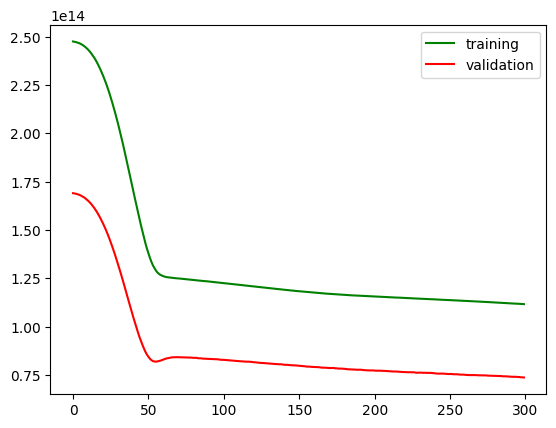

In [ ]:
# plotting loss of training and validation sets
plt.plot(dl1_1000.history.history['loss'],
color = 'blue',
label = 'training')
plt.plot(dl1_1000.history.history['val_loss'],
color = 'green',
label = 'validation')
plt.legend()


In [ ]:
dl1_min_loss = np.min(dl1_1000.history.history['loss'])
dl1_min_valloss = np.min(dl1_1000.history.history['val_loss'])

print('Min Training Loss (Error): ' , (round(dl1_min_loss, 4)))
print('Min Validation Loss (Error): ', (round(dl1_min_valloss, 4)))


Min Training Loss (Error):  111731812597760.0
Min Validation Loss (Error):  73828080287744.0


In [ ]:
dl1_trn_rmse = np.mean(dl1_1000.history.history['root_mean_squared_error'])
dl1_val_rmse = np.mean(dl1_1000.history.history['val_root_mean_squared_error'])

print('Average Training RMSE: ' , (round(dl1_train_rmse, 5)))
print('Average Validation RMSE: ', (round(dl1_val_rmse, 5)))


Average Training RMSE:  11458239.43333
Average Validation RMSE:  9346681.44


In [ ]:
dl1_trn_mae = np.mean(dl1_1000.history.history['mean_absolute_error'])
dl1_val_mae = np.mean(dl1_1000.history.history['val_mean_absolute_error'])

print('Average Training MAE: ' , (round(dl1_trn_mae, 5)))
print('Average Validation MAE: ', (round(dl1_val_mae, 5)))

Average Training MAE:  8309362.31
Average Validation MAE:  7228096.89833


In [ ]:
dl1_1000_Rtrn = np.mean(dl1_1000.history.history['r2_score'])
dl1_1000_Rval = np.mean(dl1_1000.history.history['val_r2_score'])

print('Average Training R-squared: ' , (round(dl1_1000_Rtrn, 5)))
print('Average Validation R-squared: ', (round(dl1_1000_Rval, 5)))

Average Training R-squared:  -0.54011
Average Validation R-squared:  -0.98269


In [ ]:
#Timing the model fitting
dl1_1000_time = """
#Fitting the first DL model
dl1_1000 = dl_model_config()
dl1_1000.fit(Xtrn, ytrn,
             epochs = 300,
             batch_size = 32,
             validation_split = 0.20,
             verbose = 0)

dl1_1000.summary()
"""

dl1_1000_time = round(timeit.timeit(stmt = dl1_1000_time, globals=globals(), number=1), 5)
print(dl1_1000_time, 'seconds')

C:\Users\cmnea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,868 (19.02 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,435 (9.52 KB)

35.37079 seconds


In [ ]:
train_start = time.time()
dl1_1000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

pred_start = time.time()

dl1_1000.predict(Xtrain)
dl1_1000.predict(Xtest)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112066853601280.0000 - mean_absolute_error: 7599187.0000 - r2_score: -0.3429 - root_mean_squared_error: 10569374.0000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.45778822898864746

In [ ]:
# model efficiency
dl1_avg_rmse = (dl1_train_rmse + dl1_val_rmse) / 2
dl1_1000_eff = dl1_avg_rmse / train_pred_time

dl1_1000_eff / 100000

227.2330256207753

In [ ]:
## DL Network sequential model with 4 dense layers, l1 regularization, with relu and linear activation functions 1,000

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1

#second model configuration
def dl_model_config():

#Sequential model with 4 dense layers, l1 regularization, with relu and linear activation functions
dl_model = Sequential()
dl_model.add(Dense(64,
                   input_dim = Xtrn.shape[1],
                   kernel_regularizer = l1(0.05),
                   activation = 'relu'))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32,
                   activation = 'relu',
                   kernel_regularizer = l1(0.05)))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16,
                   activation = 'relu',
                   kernel_regularizer = l1(0.05)))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1,
                   activation = 'linear'))

#Compiling with the adam optimizer and MSE loss
dl_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = metrics)

return dl_model



In [ ]:
 # fitting the second model
dl2_1000 = dl_model_config()
dl2_1000.fit(Xtrain, ytrain, epochs = 300, batch_size = 32,validation_split = 0.20,verbose = 0)

dl2_1000.summary()

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 0.05 (of type <class 'float'>)

In [ ]:
# plotting loss of training and validation se
plt.plot(dl2_1000.history.history['loss'],
         color = 'purple',
         label = 'training')

plt.plot(dl2_1000.history.history['val_loss'],
         color = 'orange',
         label = 'validation')

plt.legend()


NameError: name 'dl2_1000' is not defined

In [ ]:
dl2_min_loss = np.min(dl2_1000.history.history['loss'])
dl2_min_valloss = np.min(dl2_1000.history.history['val_loss'])
print('Min Training Loss (Error): ' , (round(dl2_min_loss, 4)))
print('Min Validation Loss (Error): ', (round(dl2_min_valloss, 4)))


NameError: name 'dl2_1000' is not defined

In [ ]:
dl2_train_rmse = np.mean(dl2_1000.history.history['root_mean_squared_error'])
dl2_val_rmse = np.mean(dl2_1000.history.history['val_root_mean_squared_error'])
print('Average Training RMSE: ' , (round(dl2_train_rmse, 5)))
print('Average Validation RMSE: ', (round(dl2_val_rmse, 5)))


NameError: name 'dl2_1000' is not defined

In [ ]:
 dl2_trn_mae = np.mean(dl2_1000.history.history['mean_absolute_error'])
dl2_val_mae = np.mean(dl2_1000.history.history['val_mean_absolute_error'])
print('Average Training MAE: ' , (round(dl2_train_mae, 5)))
print('Average Validation MAE: ', (round(dl2_val_mae, 5)))


NameError: name 'dl2_1000' is not defined

In [ ]:
dl2_1000_Rtrain = np.mean(dl2_1000.history.history['r2_score'])
dl2_1000_Rval = np.mean(dl2_1000.history.history['val_r2_score'])
print('Average Training R-squared: ' , (round(dl2_1000_Rtrain, 5)))
print('Average Validation R-squared: ', (round(dl2_1000_Rval, 5)))


NameError: name 'dl2_1000' is not defined

In [ ]:
 # timing model fit
dl2_1000_time = """
#Fitting the second model
dl2_1000 = dl_model_config()
dl2_1000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl2_1000.summary()
"""
dl2_1000_time = round(timeit.timeit(stmt = dl2_1000_time, globals=globals(),number=1), 5)
print(dl2_1000_time, 'seconds')

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 0.05 (of type <class 'float'>)

In [ ]:
train_start = time.time()
dl2_1000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

pred_start = time.time()

dl2_1000.predict(Xtrn)
dl2_1000.predict(Xtst)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time

NameError: name 'dl2_1000' is not defined

In [ ]:
#model efficiency
dl2_1000_eff = dl2_avg_rmse / train_pred_time

dl2_1000_eff / 100000

NameError: name 'dl2_trn_rmse' is not defined

In [ ]:
# 10,000
# setting the predictors and the outcome variable
Y = df_10000['Y']
X = df_10000[['X1', 'X2', 'X3', 'X4']]

In [ ]:
# splitting into training and testing
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X,
Y,
test_size = 0.20,
random_state = 30)
print('Training size: ', Xtrain.shape, ytrain.shape)
print('Testing size: ', Xtest.shape, ytest.shape)

Training size:  (8000, 4) (8000,)
Testing size:  (2000, 4) (2000,)


In [ ]:
## GLM LBFGS 10,000

In [ ]:
#third GLM model
glm3_10000 = TweedieRegressor(power = 0,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'lbfgs')
glm3_10000.fit(Xtrn, ytrn)

TweedieRegressor(alpha=1, max_iter=300, power=0, tol=1e-06)

In [ ]:
# predictions
glm3_trainpreds = glm3_10000.predict(Xtrain)
glm3_testpreds = glm3_10000.predict(Xtest)

#MSE and RMSE - training set
glm3_train_mse = mean_squared_error(ytrain, glm3_trainpreds)
glm3_train_rmse = np.sqrt(glm3_train_mse)

# MSE and RMSE - testing set
glm3_test_mse = mean_squared_error(ytst, glm3_testpreds)
glm3_test_rmse = np.sqrt(glm3_test_mse)
print('Training set RMSE: ', round(glm3_train_rmse, 5))
print('Holdout set RMSE: ', round(glm3_test_rmse, 5))



Training set RMSE:  2838725.5085
Holdout set RMSE:  2868557.83741


In [ ]:
# R-squared - training set
glm3_10000_Rtrain = glm3_10000.score(Xtrain, ytrain)
# R-squared - testing set
glm3_10000_Rtest = glm3_10000.score(Xtest, ytest)
print('Training set R-squared: ', glm3_10000_Rtrain)
print('Holdout set R-squared: ', glm3_10000_Rtest)


Training set R-squared:  0.9095443422315899
Holdout set R-squared:  0.9029136633113383


In [ ]:
#timing model
glm3_10000_time = """
glm3_10000 = TweedieRegressor(power = 0,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'lbfgs')
#Fitting the model
glm3_10000.fit(Xtrain, ytrain)
"""
glm3_10000_time = round(timeit.timeit(stmt = glm3_10000_time,globals=globals(), number=1), 5)
print(glm3_10000_time, 'seconds')


0.07279 seconds


In [ ]:
train_start = time.time()
glm3_10000.fit(Xtrain, ytrain)
train_time = time.time() - train_start

pred_start = time.time()

glm3_10000.predict(Xtrain)
glm3_10000.predict(Xtest)

pred_time = time.time() - pred_start

train_pred_time = train_time + pred_time
train_pred_time



0.08741211891174316

In [ ]:
#model efficiency
glm3_avg_rmse = (glm3_train_rmse + glm3_test_rmse) / 2
glm3_10000_eff = glm3_avg_rmse / train_pred_time
glm3_10000_eff / 100000

326.4583570889415

In [ ]:
## GLM Newton-Cholesky 10,000

In [ ]:
#fourth GLM model
glm4_10000 = TweedieRegressor(power = 1,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'newton-cholesky')
glm4_10000.fit(Xtrain, ytrain)


C:\Users\cmnea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:423: ConvergenceWarning: Newton solver did not converge after 300 iterations.
  warnings.warn(


TweedieRegressor(alpha=1, max_iter=300, power=1, solver='newton-cholesky',
                 tol=1e-06)

In [ ]:
#predictions
glm4_trainpreds = glm4_10000.predict(Xtrain)
glm4_testpreds = glm4_10000.predict(Xtest)
# calculating MSE and RMSE - training set
glm4_train_mse = mean_squared_error(ytrn, glm4_trainpreds)
glm4_train_rmse = np.sqrt(glm4_train_mse)
# calculating MSE and RMSE - holdout set
glm4_test_mse = mean_squared_error(ytest, glm4_testpreds)
glm4_test_rmse = np.sqrt(glm4_test_mse)
print('Training set RMSE: ', round(glm4_train_rmse, 5))
print('Holdout set RMSE: ', round(glm4_test_rmse, 5))


Training set RMSE:  1683566.78363
Holdout set RMSE:  1745325.03202


In [ ]:
# R-squared - training set
glm4_10000_Rtrain = glm4_10000.score(Xtrain, ytrain)
# R-squared - testing set
glm4_10000_Rtest = glm4_10000.score(Xtest, ytest)
print('Training set R-squared: ', glm4_10000_Rtrain)
print('Holdout set R-squared: ', glm4_10000_Rtest)


Training set R-squared:  0.9685965494187154
Holdout set R-squared:  0.9672198467907592


In [ ]:
# timing model fit
glm4_10000_time = """
glm4_10000 = TweedieRegressor(power = 1,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'newton-cholesky')
glm4_10000.fit(Xtrn, ytrn)
"""
glm4_10000_time = round(timeit.timeit(stmt = glm4_10000_time,globals=globals(), number=1), 5)
print(glm4_10000_time, 'seconds')


0.25451 seconds


C:\Users\cmnea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:423: ConvergenceWarning: Newton solver did not converge after 300 iterations.
  warnings.warn(


In [ ]:
train_start = time.time()
glm4_10000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
glm4_10000.predict(Xtrain)
glm4_10000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

C:\Users\cmnea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:423: ConvergenceWarning: Newton solver did not converge after 300 iterations.
  warnings.warn(


0.16466760635375977

In [ ]:
#model efficiency
glm4_avg_rmse = (glm4_train_rmse + glm4_test_rmse) / 2
glm4_10000_eff = glm4_avg_rmse / train_pred_time
glm4_10000_eff / 100000


104.11555410260596

In [ ]:
 ## XGBoost 10,000
#parameters
tuning_grid = {
'max_depth': [3, 4, 5, 6, 7, 8, 9],
'n_estimators': [10, 50, 100, 200, 300],
'learning_rate': [0.1, 0.5, 0.8],
'colsample_bytree': [0.6, 0.8, 1.0],
'reg_alpha': [0, 0.5, 1, 2],
'reg_lambda': [0, 1, 2]
}

xgb_grid_10000 = XGBRegressor(objective = 'reg:tweedie', random_state = 30)
#GridSearchCV object
grid_search = GridSearchCV(estimator = xgb_grid_10000,
param_grid = tuning_grid,
scoring = 'neg_mean_squared_error',
cv = 5,
n_jobs = -1,
verbose = 2)
# fitting grid search
grid_search.fit(Xtrain, ytrain)




Fitting 5 folds for each of 3780 candidates, totalling 18900 fits


KeyboardInterrupt: 

In [ ]:
#best params
grid_search.best_params_

In [ ]:
## XGBoost 5-fold Cross Validation 10,000

In [ ]:
#5-fold cross validation
kfoldcv = KFold(n_splits = 5)
#third model
xgb3_10000 = XGBRegressor(alpha = 1,
learning_rate = 0.5,
max_depth = 3,
n_estimators = 300,
colsample_bytree = 0.8,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)
#fitting model
xgb3_10000.fit(Xtrain, ytrain


In [ ]:
#negative score
xgb3_train_rslt = cross_val_score(xgb3_10000,
Xtairn, ytrain,
scoring = 'neg_root_mean_squared_error',
cv = kfoldcv,
n_jobs = -1)
#negative score
xgb3_test_rslt = cross_val_score(xgb3_10000,
Xtest, ytest,
scoring = 'neg_root_mean_squared_error',
cv = kfoldcv,
n_jobs = -1)
#inverting values
xgb3_train_rmse = np.mean(-xgb3_train_rslt)
#inverting values
xgb3_test_rmse = np.mean(-xgb3_test_rslt)
print('Training set RMSE: ', round(xgb3_train_rmse, 5))
print('Training set RMSE: ', round(xgb3_test_rmse, 5))


In [ ]:
# R-squared - training set
xgb3_10000_Rtrain = xgb3_10000.score(Xtrain, ytrain)
#R-squared - testing set
xgb3_10000_Rtest = xgb3_10000.score(Xtest, ytest)
print('Training set R-squared: ', xgb3_10000_Rtrain)
print('Holdout set R-squared: ', xgb3_10000_Rtest)


In [ ]:
#timing model
xgb3_10000_time = """
xgb3_10000 = XGBRegressor(alpha = 1,
learning_rate = 0.5,
max_depth = 3,
n_estimators = 300,
colsample_bytree = 0.8,
reg_lambda = 0,
objective = 'reg:tweedie',
random_state = 30)
xgb3_10000.fit(Xtrain, ytrain)
"""
xgb3_10000_time = round(timeit.timeit(stmt = xgb3_10000_time,␣
↪globals=globals(), number=1), 5)
print(xgb3_10000_time, 'seconds')


In [ ]:
train_start = time.time()
xgb3_10000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
xgb3_10000.predict(Xtrain)
xgb3_10000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
#model efficiency
xgb3_avg_rmse = (xgb3_train_rmse + xgb3_test_rmse) / 2
xgb3_10000_eff = xgb3_avg_rmse / train_pred_time
xgb3_10000_eff / 100000

In [ ]:
## XGBoost Repeated 5-fold Cross Validation with 5 repeats 10,000

In [ ]:
#repeated 5-fold cross validation with 5 repeats
rpt_kfoldcv = RepeatedKFold(n_splits = 5,
n_repeats = 5,
random_state = 30)
#fourth model
xgb4_10000 = XGBRegressor(alpha = 2,
learning_rate = 0.5,
max_depth = 3,
n_estimators = 300,
colsample_bytree = 0.8,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)
xgb4_10000.fit(Xtrain, ytrain)

In [ ]:
 #negativbe scoring
xgb4_train_rslt = cross_val_score(xgb4_10000,
Xtrain, ytrain,
scoring = 'neg_root_mean_squared_error',
cv = rpt_kfoldcv,
n_jobs = -1)
#negative scoring
xgb4_test_rslt = cross_val_score(xgb4_10000,
Xtest, ytest,
scoring = 'neg_root_mean_squared_error',
cv = rpt_kfoldcv,
n_jobs = -1)
# inverting results
xgb4_train_rmse = np.mean(-xgb4_train_rslt)
xgb4_test_rmse = np.mean(-xgb4_test_rslt)
print('Training set RMSE: ', round(xgb4_train_rmse, 5))
print('Training set RMSE: ', round(xgb4_tst_rmse, 5))

In [ ]:
#R-squared - training set
xgb4_10000_Rtrain = xgb4_10000.score(Xtrain, ytrain)
# R-squared - testing set
xgb4_10000_Rtest = xgb4_10000.score(Xtest, ytest)
print('Training set R-squared: ', xgb4_10000_Rtrain)
print('Holdout set R-squared: ', xgb4_10000_Rtest)


In [ ]:
#timing model fit
xgb4_10000_time = """
xgb4_10000 = XGBRegressor(alpha = 1,
learning_rate = 0.5,
max_depth = 3,
n_estimators = 300,
colsample_bytree = 1,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)
xgb4_10000.fit(Xtrain, ytrain)
"""
xgb4_10000_time = round(timeit.timeit(stmt = xgb4_10000_time,␣
↪globals=globals(), number=1), 5)
print(xgb4_10000_time, 'seconds')

In [ ]:
train_start = time.time()
xgb4_10000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
xgb4_10000.predict(Xtrain)
xgb4_10000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
#model efficiency
xgb4_avg_rmse = (xgb4_train_rmse + xgb4_test_rmse) / 2
xgb4_10000_eff = xgb4_avg_rmse / train_pred_time
xgb4_10000_eff / 100000

In [ ]:
## DL Network 10,000
#metrics
metrics = [tf.keras.metrics.RootMeanSquaredError(name ='root_mean_squared_error', dtype = None),
tf.keras.metrics.R2Score(class_aggregation = 'uniform_average',num_regressors = 0, name = "r2_score", dtype = None),
tf.keras.metrics.MeanAbsoluteError(name = 'mean_absolute_error',dtype = None)]


In [ ]:
## DL Network sequential model with 3 dense layers with relu and linear activation functions 10,000

In [ ]:
# third model
def dl_model_config():
#Sequential model with 3 dense layers with relu and linear activation␣
↪functions
dl_model = Sequential()
dl_model.add(Dense(64,
input_dim = Xtrain.shape[1],
activation='relu'))
dl_model.add(Dense(32,
activation = 'relu'))
dl_model.add(Dense(1,
activation = 'linear'))
dl_model.compile(optimizer = 'rmsprop',
loss = 'mse',
metrics = metrics)
return dl_model

In [ ]:
 #fitting model
dl3_10000 = dl_model_config()
dl3_10000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl3_10000.summary()

In [ ]:
#Plotting the loss of both training and validation sets
plt.plot(dl3_10000.history.history['loss'],
color = 'red',
label = 'training')
plt.plot(dl3_10000.history.history['val_loss'],
color = 'green',
label = 'validation')
plt.legend()


In [ ]:
dl3_min_loss = np.min(dl3_10000.history.history['loss'])
dl3_min_valloss = np.min(dl3_10000.history.history['val_loss'])
print('Min Training Loss (Error): ' , (round(dl3_min_loss, 4)))
print('Min Validation Loss (Error): ', (round(dl3_min_valloss, 4)))


In [ ]:
dl3_train_rmse = np.mean(dl3_10000.history.history['root_mean_squared_error'])
dl3_val_rmse = np.mean(dl3_10000.history.history['val_root_mean_squared_error'])
print('Average Training RMSE: ' , (round(dl3_train_rmse, 5)))
print('Average Validation RMSE: ', (round(dl3_val_rmse, 5)))


In [ ]:
dl3_train_mae = np.mean(dl3_10000.history.history['mean_absolute_error'])
dl3_val_mae = np.mean(dl3_10000.history.history['val_mean_absolute_error'])
print('Average Training MAE: ' , (round(dl3_train_mae, 5)))
print('Average Validation MAE: ', (round(dl3_val_mae, 5)))


In [ ]:
dl3_10000_Rtrain = np.mean(dl3_10000.history.history['r2_score'])
dl3_10000_Rval = np.mean(dl3_10000.history.history['val_r2_score'])
print('Average Training R-squared: ' , (round(dl3_10000_Rtrain, 5)))
print('Average Validation R-squared: ', (round(dl3_10000_Rval, 5)))


In [ ]:
# timing model
dl3_10000_time = """
dl3_10000 = dl_model_config()
dl3_10000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl3_10000.summary()
"""
dl3_10000_time = round(timeit.timeit(stmt = dl3_10000_time, globals=globals(),number=1), 5)
print(dl3_10000_time, 'seconds')


In [ ]:
train_start = time.time()
dl3_10000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
dl3_10000.predict(Xtrain)
dl3_10000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time


In [ ]:
# model efficiency
dl3_avg_rmse = (dl3_train_rmse + dl3_val_rmse) / 2
dl3_10000_eff = dl3_avg_rmse / train_pred_time
dl3_10000_eff / 100000

In [ ]:
## DL Network sequential model with 4 dense layers, l1 regularization, with relu and linear activation functions 10,000

In [ ]:
#fourth model configuration
def dl_model_config():
#Sequential model with 4 dense layers, l1 regularization, with relu and␣
↪linear activation functions
dl_model = Sequential()
dl_model.add(Dense(64,
input_dim = Xtrain.shape[1],
kernel_regularizer = l1(0.05),
activation = 'relu'))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32,
activation = 'relu',
kernel_regularizer = l1(0.05)))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16,
activation = 'relu',
kernel_regularizer = l1(0.05)))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1,activation = 'linear'))
dl_model.compile(optimizer = 'adam',
loss = 'mse',
metrics = metrics)
return dl_model

In [ ]:
# fitting fourth model
dl4_10000 = dl_model_config()
dl4_10000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl4_10000.summary()


In [ ]:
# plotting loss of training and validation sets
plt.plot(dl4_10000.history.history['loss'],
color = 'blue',
label = 'training')
plt.plot(dl4_10000.history.history['val_loss'],
color = 'purple',
label = 'validation')
plt.legend()

In [ ]:
dl4_min_loss = np.min(dl4_10000.history.history['loss'])
dl4_min_valloss = np.min(dl4_10000.history.history['val_loss'])
print('Min Training Loss (Error): ' , (round(dl4_min_loss, 4)))
print('Min Validation Loss (Error): ', (round(dl4_min_valloss, 4)))


In [ ]:
 dl4_train_rmse = np.mean(dl4_10000.history.history['root_mean_squared_error'])
dl4_val_rmse = np.mean(dl4_10000.history.history['val_root_mean_squared_error'])
print('Average Training RMSE: ' , (round(dl4_train_rmse, 5)))
print('Average Validation RMSE: ', (round(dl4_val_rmse, 5)))


In [ ]:
dl4_train_mae = np.mean(dl4_10000.history.history['mean_absolute_error'])
dl4_val_mae = np.mean(dl4_10000.history.history['val_mean_absolute_error'])
print('Average Training MAE: ' , (round(dl4_train_mae, 5)))
print('Average Validation MAE: ', (round(dl4_val_mae, 5)))


In [ ]:
dl4_10000_Rtrain = np.mean(dl4_10000.history.history['r2_score'])
dl4_10000_Rval = np.mean(dl4_10000.history.history['val_r2_score'])
print('Average Training R-squared: ' , (round(dl4_10000_Rtrain, 5)))
print('Average Validation R-squared: ', (round(dl4_10000_Rval, 5)))

In [ ]:
dl4_10000_time = """
dl4_10000 = dl_model_config()
dl4_10000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl4_10000.summary()
"""
dl4_10000_time = round(timeit.timeit(stmt = dl4_10000_time, globals=globals(),number=1), 5)
print(dl4_10000_time, 'seconds')


In [ ]:
train_start = time.time()
dl4_10000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
dl4_10000.predict(Xtrain)
dl4_10000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time


In [ ]:
# model efficiency
dl4_avg_rmse = (dl4_train_rmse + dl4_val_rmse) / 2
dl4_10000_eff = dl4_avg_rmse / train_pred_time
dl4_10000_eff / 100000

In [ ]:
## 100,000

In [ ]:
## GLM LBFGS 100,000

In [ ]:
#fifth GLM model
glm5_100000 = TweedieRegressor(power = 0,
                               alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'lbfgs')
glm5_100000.fit(Xtrain, ytrain)

In [ ]:
 # predictions
glm5_trainpreds = glm5_100000.predict(Xtrain)
glm5_testpreds = glm5_100000.predict(Xtest)
#MSE and RMSE - training set
glm5_train_mse = mean_squared_error(ytrain, glm5_trainpreds)
glm5_train_rmse = np.sqrt(glm5_train_mse)
# MSE and RMSE - training set
glm5_test_mse = mean_squared_error(ytest, glm5_testpreds)
glm5_test_rmse = np.sqrt(glm5_test_mse)
print('Training set RMSE: ', round(glm5_train_rmse, 5))
print('Holdout set RMSE: ', round(glm5_test_rmse, 5))


In [ ]:
# R-squared - training set
glm5_100000_Rtrain = glm5_100000.score(Xtrain, ytrain)
# R-squared - testing set
glm5_100000_Rtest = glm5_100000.score(Xtest, ytest)
print('Training set R-squared: ', glm5_100000_Rtrain)
print('Holdout set R-squared: ', glm5_100000_Rtest)


In [ ]:
glm5_100000_time = """
glm5_100000 = TweedieRegressor(power = 0,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'lbfgs')
#Fitting the model
glm5_100000.fit(Xtrain, ytrain)
"""

glm5_100000_time = round(timeit.timeit(stmt = glm5_100000_time,globals=globals(), number=1), 5)
print(glm5_100000_time, 'seconds')


In [ ]:
train_start = time.time()
glm5_100000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
glm5_100000.predict(Xtrain)
glm5_100000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
#model efficiency
glm5_avg_rmse = (glm5_train_rmse + glm5_test_rmse) / 2
glm5_100000_eff = glm5_avg_rmse / train_pred_time
glm5_100000_eff / 100000


In [ ]:
## GLM Newton-Cholesky 100,000

In [ ]:
#sixth GLM model
glm6_100000 = TweedieRegressor(power = 1,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'newton-cholesky')
glm6_100000.fit(Xtrain, ytrain)


In [ ]:
#predictions
glm6_trainpreds = glm6_100000.predict(Xtrain)
glm6_testpreds = glm6_100000.predict(Xtest)
#MSE and RMSE - training set
glm6_train_mse = mean_squared_error(ytrain, glm6_trainpreds)
glm6_train_rmse = np.sqrt(glm6_train_mse)
#MSE and RMSE - testing set
glm6_test_mse = mean_squared_error(ytest, glm6_testpreds)
glm6_test_rmse = np.sqrt(glm6_test_mse)
print('Training set RMSE: ', round(glm6_train_rmse, 5))
print('Holdout set RMSE: ', round(glm6_test_rmse, 5))


In [ ]:
#R-squared - training set
glm6_100000_Rtrain = glm6_100000.score(Xtrain, ytrain)
# R-squared for testing set
glm6_100000_Rtest = glm6_100000.score(Xtest, ytest)
print('Training set R-squared: ', glm6_100000_Rtrain)
print('Holdout set R-squared: ', glm6_100000_Rtest)

In [ ]:
glm6_100000_time = """
glm6_100000 = TweedieRegressor(power = 0,
alpha = 1,
max_iter = 300,
tol = 1e-6,
solver = 'newton-cholesky')
glm6_100000.fit(Xtrain, ytrain)
"""
glm6_100000_time = round(timeit.timeit(stmt = glm6_100000_time,globals=globals(), number=1), 5)
print(glm6_100000_time, 'seconds')


In [ ]:
train_start = time.time()
glm6_100000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
glm6_100000.predict(Xtrain)
glm6_100000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
#model efficiency
glm6_100000_eff = glm6_avg_rmse / train_pred_time
glm6_100000_eff / 100000

In [ ]:
## XGBoost 100,000
#parameters
tuning_grid = {
'max_depth': [3, 4, 5, 6, 7, 8, 9],
'n_estimators': [10, 50, 100, 200, 300],
'learning_rate': [0.1, 0.5, 0.8],
'colsample_bytree': [0.6, 0.8, 1.0],
'reg_alpha': [0, 0.5, 1, 2],
'reg_lambda': [0, 1, 2]
}
xgb_grid_100000 = XGBRegressor(objective = 'reg:tweedie', random_state = 30)
grid_search = GridSearchCV(estimator = xgb_grid_100000,
param_grid = tuning_grid,
scoring = 'neg_mean_squared_error',
cv = 5,
n_jobs = -1,
verbose = 2)
grid_search.fit(Xtrain, ytrain)
grid_search.best_params_


In [ ]:
## XGBoost 5-fold Cross Validation 100,000

In [ ]:
#5-fold cross validation
kfoldcv = KFold(n_splits = 5)


In [ ]:
#Fitting fifth model
xgb5_100000 = XGBRegressor(alpha = 0,
learning_rate = 0.1,
max_depth = 7,
n_estimators = 300,
colsample_bytree = 1,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)


In [ ]:
# fitting model
xgb5_100000.fit(Xtrain, ytrain)

In [ ]:
#negative scoring
xgb5_train_rslt = cross_val_score(xgb5_100000,
Xtrain, ytrain,
scoring = 'neg_root_mean_squared_error',
cv = kfoldcv,
n_jobs = -1)

In [ ]:
 #negative scoring
xgb5_test_rslt = cross_val_score(xgb5_100000,
Xtest, ytest,
scoring = 'neg_root_mean_squared_error',
cv = kfoldcv,
n_jobs = -1)

In [ ]:
# inverting outcome
xgb5_train_rmse = np.mean(-xgb5_train_rslt)

In [ ]:
#inverting outcome
xgb5_test_rmse = np.mean(-xgb5_test_rslt)

In [ ]:
print('Training set RMSE: ', round(xgb5_train_rmse, 5))
print('Training set RMSE: ', round(xgb5_test_rmse, 5))

In [ ]:
#R-squared - training set
xgb5_100000_Rtrn = xgb5_100000.score(Xtrain, ytrain)
# R-squared - testing set
xgb5_100000_Rtst = xgb5_100000.score(Xtest, ytest)
print('Training set R-squared: ', xgb5_100000_Rtrain)
print('Holdout set R-squared: ', xgb5_100000_Rtest)


In [ ]:
 xgb5_100000_time = """
xgb5_100000 = XGBRegressor(alpha = 0,
learning_rate = 0.1,
max_depth = 7,
n_estimators = 300,
colsample_bytree = 1,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)
xgb5_100000.fit(Xtrain, ytrain)
"""
xgb5_100000_time = round(timeit.timeit(stmt = xgb5_100000_time,globals=globals(), number=1), 5)
print(xgb5_100000_time, 'seconds')


In [ ]:
train_start = time.time()
xgb5_100000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
xgb5_100000.predict(Xtrn)
xgb5_100000.predict(Xtst)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
#model efficiency
xgb5_avg_rmse = (xgb5_train_rmse + xgb5_test_rmse) / 2
xgb5_100000_eff = xgb5_avg_rmse / train_pred_time
xgb5_100000_eff / 100000

In [ ]:
## XGBoost Repeated 5-fold Cross Validation with 5 repeats 100000

In [ ]:
#repeated 5-fold cross validation with 5 repeats
rpt_kfoldcv = RepeatedKFold(n_splits = 5,
n_repeats = 5,
random_state = 30)

In [ ]:
 #sixth model
xgb6_100000 = XGBRegressor(alpha = 0,
learning_rate = 0.1,
max_depth = 7,
n_estimators = 300,
colsample_bytree = 1,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)

In [ ]:
#Model fitting
xgb6_100000.fit(Xtrain, ytrain)

In [ ]:
 #negative scoring
xgb6_train_rslt = cross_val_score(xgb6_100000,
Xtrain, ytrain,
scoring = 'neg_root_mean_squared_error',
cv = rpt_kfoldcv,
n_jobs = -1)


In [ ]:
#negative scoring
xgb6_tst_rslt = cross_val_score(xgb6_100000,
Xtest, ytest,
scoring = 'neg_root_mean_squared_error',
cv = rpt_kfoldcv,
n_jobs = -1)


In [ ]:
#inverting outcome
xgb6_train_rmse = np.mean(-xgb6_train_rslt)


In [ ]:
#inverting outcome
xgb6_test_rmse = np.mean(-xgb6_test_rslt)

In [ ]:
print('Training set RMSE: ', round(xgb6_train_rmse, 5))
print('Training set RMSE: ', round(xgb6_test_rmse, 5))

In [ ]:
#R-squared - training set
xgb6_100000_Rtrain = xgb6_100000.score(Xtrain, ytrain)
# R-squared - testing set
xgb6_100000_Rtest = xgb6_100000.score(Xtest, ytest)

In [ ]:
xgb6_100000_time = """
xgb6_100000 = XGBRegressor(alpha = 1,
learning_rate = 0.5,
max_depth = 3,
n_estimators = 300,
colsample_bytree = 1,
reg_lambda = 1,
objective = 'reg:tweedie',
random_state = 30)
xgb6_100000.fit(Xtrain, ytrain)
"""
xgb6_100000_time = round(timeit.timeit(stmt = xgb6_100000_time,globals=globals(), number=1), 5)
print(xgb6_100000_time, 'seconds')


In [ ]:
train_start = time.time()
xgb6_100000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
xgb6_100000.predict(Xtrain)
xgb6_100000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
# model efficiency
xgb6_avg_rmse = (xgb6_train_rmse + xgb6_test_rmse) / 2
xgb6_100000_eff = xgb6_avg_rmse / train_pred_time

In [ ]:

xgb6_100000_eff / 100000

In [ ]:
## DL Network 100,000
#metrics
metrics = [tf.keras.metrics.RootMeanSquaredError(name ='root_mean_squared_error', dtype = None),
tf.keras.metrics.R2Score(class_aggregation = 'uniform_average',num_regressors = 0, name = "r2_score", dtype = None),
tf.keras.metrics.MeanAbsoluteError(name = 'mean_absolute_error',dtype = None)]


In [ ]:
## DL Network sequential model with 3 dense layers with relu and linear activation functions 100,000

In [ ]:
 def dl_model_config():
#Sequential model with 3 dense layers with relu and linear activation functions
dl_model = Sequential()
dl_model.add(Dense(64,
input_dim = Xtrain.shape[1],
activation='relu'))
dl_model.add(Dense(32,
activation = 'relu'))
dl_model.add(Dense(1,
activation = 'linear'))


In [ ]:
dl_model.compile(optimizer = 'rmsprop',
loss = 'mse',
metrics = metrics)
return dl_model


In [ ]:
dl5_100000 = dl_model_config()
dl5_100000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl5_100000.summary()

In [ ]:
plt.plot(dl5_100000.history.history['loss'],
color = 'red,
label = 'training')
plt.plot(dl5_100000.history.history['val_loss'],
color = 'blue',
label = 'validation')
plt.legend()

In [ ]:
dl5_min_loss = np.min(dl5_100000.history.history['loss'])
dl5_min_valloss = np.min(dl5_100000.history.history['val_loss'])
print('Min Training Loss (Error): ' , (round(dl5_min_loss, 4)))
print('Min Validation Loss (Error): ', (round(dl5_min_valloss, 4)))


In [ ]:
dl5_train_rmse = np.mean(dl5_100000.history.history['root_mean_squared_error'])
dl5_val_rmse = np.mean(dl5_100000.history.history['val_root_mean_squared_error'])
print('Average Training RMSE: ' , (round(dl5_train_rmse, 5)))
print('Average Validation RMSE: ', (round(dl5_val_rmse, 5)))

In [ ]:
dl5_train_mae = np.mean(dl5_100000.history.history['mean_absolute_error'])
dl5_val_mae = np.mean(dl5_100000.history.history['val_mean_absolute_error'])
print('Average Training MAE: ' , (round(dl5_train_mae, 5)))
print('Average Validation MAE: ', (round(dl5_val_mae, 5)))


In [ ]:
 dl5_100000_Rtrain = np.mean(dl5_100000.history.history['r2_score'])
dl5_100000_Rval = np.mean(dl5_100000.history.history['val_r2_score'])
print('Average Training R-squared: ' , (round(dl5_100000_Rtrain, 5)))
print('Average Validation R-squared: ', (round(dl5_100000_Rval, 5)))

In [ ]:
dl5_100000_time = """
dl5_100000 = dl_model_config()
dl5_100000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl5_100000.summary()
"""
dl5_100000_time = round(timeit.timeit(stmt = dl5_100000_time,globals=globals(), number=1), 5)
print(dl5_100000_time, 'seconds')


In [ ]:
train_start = time.time()
dl5_100000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
dl5_100000.predict(Xtrain)
dl5_100000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
dl5_avg_rmse = (dl5_train_rmse + dl5_val_rmse) / 2
dl5_100000_eff = dl5_avg_rmse / train_pred_time
dl5_100000_eff / 100000

In [ ]:
## DL Network sequential model with 4 dense layers, l1 regularization, with relu and linear activation functions 100,000

In [ ]:
def dl_model_config():
#Sequential model with 4 dense layers, l1 regularization, with relu and␣
↪linear activation functions
dl_model = Sequential()
dl_model.add(Dense(64,
input_dim = Xtrain.shape[1],
kernel_regularizer = l1(0.05),
activation = 'relu'))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32,
activation = 'relu',
kernel_regularizer = l1(0.05)))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16,
activation = 'relu',
kernel_regularizer = l1(0.05)))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1,
activation = 'linear'))
dl_model.compile(optimizer = 'adam',
loss = 'mse',
metrics = metrics)
return dl_model

In [ ]:
# fitting sixth model
dl6_100000 = dl_model_config()
dl6_100000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl6_100000.summary()


In [ ]:
plt.plot(dl6_100000.history.history['loss'],
color = 'blue',
label = 'training')
plt.plot(dl6_100000.history.history['val_loss'],
color = 'green',
label = 'validation')
plt.legend()


In [ ]:
dl6_min_loss = np.min(dl6_100000.history.history['loss'])
dl6_min_valloss = np.min(dl6_100000.history.history['val_loss'])
print('Min Training Loss (Error): ' , (round(dl6_min_loss, 4)))
print('Min Validation Loss (Error): ', (round(dl6_min_valloss, 4)))


In [ ]:
dl6_train_rmse = np.mean(dl6_100000.history.history['root_mean_squared_error'])
dl6_val_rmse = np.mean(dl6_100000.history.history['val_root_mean_squared_error'])
print('Average Training RMSE: ' , (round(dl6_train_rmse, 5)))
print('Average Validation RMSE: ', (round(dl6_val_rmse, 5)))



In [ ]:
dl6_train_mae = np.mean(dl6_100000.history.history['mean_absolute_error'])
dl6_val_mae = np.mean(dl6_100000.history.history['val_mean_absolute_error'])
print('Average Training MAE: ' , (round(dl6_train_mae, 5)))
print('Average Validation MAE: ', (round(dl6_val_mae, 5)))


In [ ]:
dl6_100000_Rtrain = np.mean(dl6_100000.history.history['r2_score'])
dl6_100000_Rval = np.mean(dl6_100000.history.history['val_r2_score'])
print('Average Training R-squared: ' , (round(dl6_100000_Rtrain, 5)))
print('Average Validation R-squared: ', (round(dl6_100000_Rval, 5)))


In [ ]:
dl6_100000_time = """
dl6_100000 = dl_model_config()
dl6_100000.fit(Xtrain, ytrain,
epochs = 300,
batch_size = 32,
validation_split = 0.20,
verbose = 0)
dl6_100000.summary()
"""
dl6_100000_time = round(timeit.timeit(stmt = dl6_100000_time,␣
↪globals=globals(), number=1), 5)
print(dl6_100000_time, 'seconds')


In [ ]:
train_start = time.time()
dl6_100000.fit(Xtrain, ytrain)
train_time = time.time() - train_start
pred_start = time.time()
dl6_100000.predict(Xtrain)
dl6_100000.predict(Xtest)
pred_time = time.time() - pred_start
train_pred_time = train_time + pred_time
train_pred_time

In [ ]:
 #model efficiency
dl6_avg_rmse = (dl6_train_rmse + dl6_val_rmse) / 2
dl6_100000_eff = dl6_avg_rmse / train_pred_time
#Dividing to scale the value
dl6_100000_eff / 100000

In [ ]:

##Summarization of results and data visulization of required metrics

In [ ]:
table_cols = ['No. of Rows (Data size)', 'Method', 'Configuration',
'Training Set Performance (RMSE)', 'Generalization Set Performance (RMSE)',
'Training Time (seconds)', 'Efficiency']
sum_table = pd.DataFrame(columns = table_cols)
sum_table

In [ ]:
#loop
table_input = [[1000, 'GLM', 'Solver 1', glm1_trn_rmse, glm1_tst_rmse,glm1_1000_time, glm1_eff_scl],
[1000, 'GLM', 'Solver 2', glm2_trn_rmse, glm2_tst_rmse,glm2_1000_time, glm2_eff_scl],
[1000, 'XGBoost', 'Configuration 1', xgb1_trn_rmse,xgb1_tst_rmse, xgb1_1000_time, xgb1_eff_scl],
[1000, 'XGBoost', 'Configuration 2', xgb2_trn_rmse,xgb2_tst_rmse, xgb2_1000_time, xgb2_eff_scl],
[1000, 'DL Network', 'Configuration 1', dl1_trn_rmse,dl1_val_rmse, dl1_1000_time, dl1_eff_scl],
[1000, 'DL Network', 'Configuration 2', dl2_trn_rmse,dl2_val_rmse, dl2_1000_time, dl2_eff_scl],
[10000, 'GLM', 'Solver 1', glm3_trn_rmse, glm3_tst_rmse,glm3_10000_time, glm3_eff_scl],
[10000, 'GLM', 'Solver 2', glm4_trn_rmse, glm4_tst_rmse,glm4_10000_time, glm4_eff_scl],
[10000, 'XGBoost', 'Configuration 1', xgb3_trn_rmse,xgb3_tst_rmse, xgb3_10000_time, xgb3_eff_scl],
[10000, 'XGBoost', 'Configuration 2', xgb4_trn_rmse,xgb4_tst_rmse, xgb4_10000_time, xgb4_eff_scl],
[10000, 'DL Network', 'Configuration 1', dl3_trn_rmse,dl3_val_rmse, dl3_10000_time, dl3_eff_scl],
[10000, 'DL Network', 'Configuration 2', dl4_trn_rmse,dl4_val_rmse, dl4_10000_time, dl4_eff_scl],
[100000, 'GLM', 'Solver 1', glm5_trn_rmse, glm5_tst_rmse,glm5_100000_time, glm5_eff_scl],
[100000, 'GLM', 'Solver 2', glm6_trn_rmse, glm6_tst_rmse,glm6_100000_time, glm6_eff_scl],
[100000, 'XGBoost', 'Configuration 1', xgb5_trn_rmse,xgb5_tst_rmse, xgb5_100000_time, xgb5_eff_scl],
[100000, 'XGBoost', 'Configuration 2', xgb6_trn_rmse,xgb6_tst_rmse, xgb6_100000_time, xgb6_eff_scl],
[100000, 'DL Network', 'Configuration 1', dl5_trn_rmse,dl5_val_rmse, dl5_100000_time, dl5_eff_scl],
[100000, 'DL Network', 'Configuration 2', dl6_trn_rmse,dl6_val_rmse, dl6_100000_time, dl6_eff_scl]]


for rows in table_input:
sum_table.loc[len(sum_table)] = rows


In [ ]:
# Plotting

In [ ]:
 #data
data_sz = [1000, 10000, 100000]
#assigning data
glm_data = sum_table[sum_table['Method'] == 'GLM']
xgb_data = sum_table[sum_table['Method'] == 'XGBoost']
dl_data = sum_table[sum_table['Method'] == 'DL Network']


In [ ]:
#GLM Plots

In [ ]:
glm_data['No. of Rows (Data size)'] = pd.Categorical(glm_data['No. of Rows(Data size)'],
categories=[1000, 10000,100000])

In [ ]:
# GLM training time by size of data
plt.figure(figsize=(4, 4))
sns.barplot(data = glm_data,
x = 'No. of Rows (Data size)',
y = 'Training Time (seconds)',
hue = 'Configuration')
plt.title('GLM fit time by dataset size')
plt.xlabel('Data size')
plt.ylabel('Fitting time (secs)')
plt.legend()

In [ ]:
# GLM performance by size of data
plt.figure(figsize = (4, 4))
sns.barplot(data = glm_data,
x = 'No. of Rows (Data size)',
y = 'Generalization Set Performance (RMSE)',
hue = 'Configuration')
plt.title('GLM RMSE by dataset size')
plt.xlabel('Data size')
plt.ylabel('Gen set RMSE')
plt.legend()

In [ ]:
## XGBoost Plots

In [ ]:
xgb_data['No. of Rows (Data size)'] = pd.Categorical(xgb_data['No. of Rows(Data size)'],
categories=[1000, 10000,100000])

In [ ]:
# XGBoost training time - size of data
plt.figure(figsize = (4, 4))
sns.barplot(data = xgb_data,
x = 'No. of Rows (Data size)',
y = 'Training Time (seconds)',
hue = 'Configuration')
plt.title('XGB fit time by dataset size')
plt.xlabel('Data size')
plt.ylabel('Fitting time (secs)')
plt.legend()


In [ ]:
# XGBoost performance - size of data
plt.figure(figsize = (4, 4))
sns.barplot(data = xgb_data,
x = 'No. of Rows (Data size)',
y = 'Generalization Set Performance (RMSE)',
hue = 'Configuration')
plt.title('XGB RMSE by dataset size')
plt.xlabel('Data size')
plt.ylabel('Gen set RMSE')
plt.legend()


In [ ]:
## DL Network Plots

In [ ]:
dl_data['No. of Rows (Data size)'] = pd.Categorical(dl_data['No. of Rows (Datasize)'],100000])

In [ ]:
# DL Network
plt.figure(figsize = (4, 4))
sns.barplot(data = dl_data,
x = 'No. of Rows (Data size)',
y = 'Training Time (seconds)',
hue = 'Configuration')
plt.title('DL fit time by dataset size')
plt.xlabel('Data size')
plt.ylabel('Fitting time (secs)')
plt.legend()

In [ ]:
# Dl Network
plt.figure(figsize = (4, 4))
sns.barplot(data = dl_data,
x = 'No. of Rows (Data size)',
y = 'Generalization Set Performance (RMSE)',
hue = 'Configuration')
plt.title('DL RMSE by dataset size')
plt.xlabel('Data size')
plt.ylabel('Gen set RMSE')
plt.legend()


In [ ]:
## GLM Plot

In [ ]:
 #GLM - model fitting time
plt.figure(figsize = (4, 4))
sns.lineplot(data = glm_data,
x = 'Training Time (seconds)',
y = 'Generalization Set Performance (RMSE)',
hue = 'Configuration',
style = 'Configuration',
markers = True)
plt.title('GLM RMSE vs. fit time')
plt.xlabel('Fitting time (secs)')
plt.ylabel('Gen set RMSE')
plt.legend()


In [ ]:
## XGBoost Plot

In [ ]:
# XGBoost - model fitting time
plt.figure(figsize = (4, 4))
sns.lineplot(data = xgb_data,
x = 'Training Time (seconds)',
y = 'Generalization Set Performance (RMSE)',
hue = 'Configuration',
style = 'Configuration',
markers = True)
plt.title('XGB RMSE vs. fit time')
plt.xlabel('Fitting time (secs)')
plt.ylabel('Gen set RMSE')
plt.legend()


In [ ]:
##DL PLot

In [ ]:
#DL - model fitting time
plt.figure(figsize = (4, 4))
sns.lineplot(data = dl_data,
x = 'Training Time (seconds)',
y = 'Generalization Set Performance (RMSE)',
hue = 'Configuration',
style = 'Configuration',
markers = True)
plt.title('DL RMSE vs. fit time')
plt.xlabel('Fitting time (secs)')
plt.ylabel('Gen set RMSE')
plt.legend()
